In [0]:
import os

#Web scraping libraries
import csv
from bs4 import BeautifulSoup
import re
!pip install selenium
from selenium import webdriver
import time

!apt-get update # to update ubuntu to correctly run apt install
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
import sys

# Imports the Google Cloud client library
from google.cloud import language
from google.cloud.language import enums
from google.cloud.language import types

#Data manupulation libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

#Libraries to manipulate dates
!pip install datetime
import datetime

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:7 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:10 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease [15.4 kB]
Get:11 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:14 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic/main amd64 Packages

In [0]:
#Date and dependencies are in a google drive folder
#Connect google drive to this notebook
from google.colab import drive
drive.mount('/content/gdrive')

#ensure the file is accessible
!ls /content/gdrive/'My Drive'/'Colab Notebooks'/'secrets hackathon'/dependencies

os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="/content/gdrive/My Drive/Colab Notebooks/secrets hackathon/dependencies/creds.json"

#ensure the path is set correctly
!echo $GOOGLE_APPLICATION_CREDENTIALS

#print token
!gcloud auth application-default print-access-token

#unzipping our google cloud sdk file
!tar -xvf "/content/gdrive/My Drive/Colab Notebooks/secrets hackathon/dependencies/google-cloud-sdk-280.0.0-linux-x86_64.tar.gz" 

#installing google cloud language
!pip install --upgrade google-cloud-language

In [0]:
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')

chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
browser_uchicago = webdriver.Chrome('chromedriver',chrome_options=chrome_options)
browser_uchicago.get('https://www.facebook.com/pg/secretsuchicago/posts/?ref=page_internal/')
SCROLL_PAUSE_TIME = 2

# Get scroll height
last_height = browser_uchicago.execute_script("return document.body.scrollHeight")
while True:
    #Scroll down to bottom
    browser_uchicago.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    #Wait to load page
    time.sleep(SCROLL_PAUSE_TIME)
    #Calculate new scroll height and compare with last scroll height
    new_height = browser_uchicago.execute_script("return document.body.scrollHeight")
    if new_height == last_height:
        break
    last_height = new_height
html = browser_uchicago.page_source

soup = BeautifulSoup(html,'lxml')

file = open('uchicagosecrets.csv','w',encoding='utf-8')
writer = csv.writer(file)

writer.writerow(['PostText UChicago','Date'])

for userContentWrapper in soup.find_all('div',class_='userContentWrapper'):
    content = userContentWrapper.find(class_='userContent').find('p').findNext('p').text
    date = userContentWrapper.find('abbr')['title']
    writer.writerow([content,date])

file.close()
browser_uchicago.close()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: use options instead of chrome_options
  import sys


AttributeError: ignored

In [0]:
browser_columbia = webdriver.Chrome('chromedriver',chrome_options=chrome_options)
browser_columbia.get('https://www.facebook.com/pg/columbiaconfessionz/posts/?ref=page_internal/')
SCROLL_PAUSE_TIME = 2
# Get scroll height
last_height = browser_columbia.execute_script("return document.body.scrollHeight")
while True:
    #Scroll down to bottom
    browser_columbia.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    #Wait to load page
    time.sleep(SCROLL_PAUSE_TIME)
    #Calculate new scroll height and compare with last scroll height
    new_height = browser_columbia.execute_script("return document.body.scrollHeight")
    if new_height == last_height:
        break
    last_height = new_height
#browser.execute_script("window.scrollTo(0,10000000)")
html = browser_columbia.page_source

soup = BeautifulSoup(html,'lxml')

file = open('columbiasecrets.csv','w',encoding='utf-8')
writer = csv.writer(file)

writer.writerow(['PostText Columbia','Date'])

for userContentWrapper in soup.find_all('div',class_='userContentWrapper'):
    content = userContentWrapper.find(class_='userContent').find('p').text
    date = userContentWrapper.find('abbr')['title']

    writer.writerow([content,date])

file.close()
browser_columbia.close()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: use options instead of chrome_options
  """Entry point for launching an IPython kernel.


AttributeError: ignored

In [0]:
browser_mit = webdriver.Chrome('chromedriver',chrome_options=chrome_options)
browser_mit.get('https://www.facebook.com/pg/beaverconfessions/posts/?ref=page_internal/')
SCROLL_PAUSE_TIME = 2
# Get scroll height
last_height = browser_mit.execute_script("return document.body.scrollHeight")

counter = 0
while True:
  while counter < 300:
    print(counter)
    counter = counter + 1
    #Scroll down to bottom
    browser_mit.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    #Wait to load page
    time.sleep(SCROLL_PAUSE_TIME)
    #Calculate new scroll height and compare with last scroll height
    new_height = browser_mit.execute_script("return document.body.scrollHeight")
    if new_height == last_height:
        break
    last_height = new_height
  break

#browser.execute_script("window.scrollTo(0,10000000)")
html = browser_mit.page_source

soup = BeautifulSoup(html,'lxml')

file = open('mitsecrets.csv','w',encoding='utf-8')
writer = csv.writer(file)

writer.writerow(['PostText MIT','Date'])

for userContentWrapper in soup.find_all('div',class_='userContentWrapper'):
  content = userContentWrapper.find(class_='userContent').find('p').text
  date = userContentWrapper.find('abbr')['title']

  writer.writerow([content,date])

file.close()
browser_mit.close()

In [0]:
browser_harvard = webdriver.Chrome('chromedriver',chrome_options=chrome_options)
browser_harvard.get('https://www.facebook.com/pg/theharvardconfessions/posts/?ref=page_internal/')
SCROLL_PAUSE_TIME = 2
# Get scroll height
last_height = browser_harvard.execute_script("return document.body.scrollHeight")
counter = 0
while True:
  while counter < 300:
    print(counter)
    counter = counter + 1
    #Scroll down to bottom
    browser_harvard.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    #Wait to load page
    time.sleep(SCROLL_PAUSE_TIME)
    #Calculate new scroll height and compare with last scroll height
    new_height = browser_harvard.execute_script("return document.body.scrollHeight")
    if new_height == last_height:
        break
    last_height = new_height
  break
#browser.execute_script("window.scrollTo(0,10000000)")
html = browser_harvard.page_source

soup = BeautifulSoup(html,'lxml')

file = open('harvardsecrets.csv','w',encoding='utf-8')
writer = csv.writer(file)

writer.writerow(['PostText Harvard','Date'])

for userContentWrapper in soup.find_all('div',class_='userContentWrapper'):
    content = userContentWrapper.find(class_='userContent').find('p').text
    date = userContentWrapper.find('abbr')['title']

    writer.writerow([content,date])

file.close()
browser_harvard.close()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: use options instead of chrome_options
  """Entry point for launching an IPython kernel.


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105


AttributeError: ignored

In [0]:
browser_stanford = webdriver.Chrome('chromedriver',chrome_options=chrome_options)
browser_stanford.get('https://www.facebook.com/pg/cardinalconfessions/posts/?ref=page_internal/')
SCROLL_PAUSE_TIME = 1
# Get scroll height
last_height = browser_stanford.execute_script("return document.body.scrollHeight")
while True:
    #Scroll down to bottom
    browser_stanford.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    #Wait to load page
    time.sleep(SCROLL_PAUSE_TIME)
    #Calculate new scroll height and compare with last scroll height
    new_height = browser_stanford.execute_script("return document.body.scrollHeight")
    if new_height == last_height:
        break
    last_height = new_height
#browser.execute_script("window.scrollTo(0,10000000)")
html = browser_stanford.page_source

soup = BeautifulSoup(html,'lxml')

file = open('stanfordsecrets.csv','w',encoding='utf-8')
writer = csv.writer(file)

writer.writerow(['PostText Stanford','Date'])

for userContentWrapper in soup.find_all('div',class_='userContentWrapper'):
    content = userContentWrapper.find(class_='userContent').find('p').text
    date = userContentWrapper.find('abbr')['title']

    writer.writerow([content,date])

file.close()
browser_stanford.close()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: use options instead of chrome_options
  """Entry point for launching an IPython kernel.


AttributeError: ignored

In [0]:
browser_caltech = webdriver.Chrome('chromedriver',chrome_options=chrome_options)
browser_caltech.get('https://www.facebook.com/pg/caltechconfessions/posts/?ref=page_internal/')
SCROLL_PAUSE_TIME = 2
# Get scroll height
last_height = browser_caltech.execute_script("return document.body.scrollHeight")
counter = 0
while True:
  while counter < 200:
    print(counter)
    counter = counter + 1
    #Scroll down to bottom
    browser_caltech.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    #Wait to load page
    time.sleep(SCROLL_PAUSE_TIME)
    #Calculate new scroll height and compare with last scroll height
    new_height = browser_caltech.execute_script("return document.body.scrollHeight")
    if new_height == last_height:
        break
    last_height = new_height
  break
#browser.execute_script("window.scrollTo(0,10000000)")
html = browser_caltech.page_source

soup = BeautifulSoup(html,'lxml')

file = open('caltechsecrets.csv','w',encoding='utf-8')
writer = csv.writer(file)

writer.writerow(['PostText Caltech','Date'])

for userContentWrapper in soup.find_all('div',class_='userContentWrapper'):
    content = userContentWrapper.find(class_='userContent').find('p').text
    date = userContentWrapper.find('abbr')['title']

    writer.writerow([content,date])

file.close()
browser_caltech.close()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: use options instead of chrome_options
  """Entry point for launching an IPython kernel.


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


AttributeError: ignored

In [0]:
autumn_start = datetime.date(2019, 9, 1).month
winter_start = datetime.date(2019, 12, 1).month
spring_start = datetime.date(2019, 3, 1).month
summer_start = datetime.date(2019, 6, 1).month

In [0]:
#Convert our strings to categorical date-data
def date_to_data(string):
  post_date = datetime.datetime.strptime(string, '%m/%d/%y, %I:%M %p')
  post_year = post_date.year
  
  loc_win_begin_year = datetime.datetime(post_year, 1, 1)
  loc_spring_start = datetime.datetime(post_year, spring_start, 1)
  loc_summer_start = datetime.datetime(post_year, summer_start, 1)
  loc_autumn_start = datetime.datetime(post_year, autumn_start, 1)
  loc_win_end_year = datetime.datetime(post_year, winter_start, 1)

  if (loc_win_begin_year <= post_date < loc_spring_start):
    return 'Winter ' + str(post_year)
  elif (loc_spring_start <= post_date < loc_summer_start):
    return 'Spring ' + str(post_year)
  elif (loc_summer_start <= post_date < loc_autumn_start):
    return 'Summer ' + str(post_year)
  elif (loc_autumn_start <= post_date < loc_win_end_year):
    return 'Autumn ' + str(post_year)
  else:
    return 'Winter ' + str(post_year + 1)

post_to_date("2/16/20, 6:59 AM")

'Winter 2020'

In [0]:
#reading in our data
df_uofc = pd.read_csv (r'/content/uchicagosecrets.csv')
posts_uofc = df_uofc["PostText UChicago"]
dates_uofc = df_uofc["Date"]


#Make new dataframe
graph_data_uchicago = pd.DataFrame(np.zeros((len(df_uofc.index),2)))

for i in range(len(posts_uofc)):
  
  # Instantiates a client
  client = language.LanguageServiceClient()

  # The text to analyze
  text = posts_uofc[i]
  document = types.Document(
      content=text,
      type=enums.Document.Type.PLAIN_TEXT)

  # Detects the sentiment of the text
  sentiment = client.analyze_sentiment(document=document).document_sentiment

  print('Text: {}'.format(text))
  print('Sentiment: {}, {}'.format(sentiment.score, sentiment.magnitude))
  
  value = (sentiment.score*sentiment.magnitude*10)
  post_date = date_to_data(dates_uofc[i])
  graph_data_uchicago.loc[i] = pd.Series({0:value, 1:post_date})



Text:  How is the Energy and Metabolism sequence? I heard it is extremely difficult. I’m considering waiting until next Fall to take it or taking Core bio in the Spring.
Sentiment: -0.20000000298023224, 0.800000011920929
Text:  How do you know if someones interested after the first date? I thought it went well? Should i wait for them to send a text first? What do i do.
Sentiment: -0.10000000149011612, 0.6000000238418579
Text:  what’s the proper spanish translation for someone who is Black?
Sentiment: 0.0, 0.0
Text:  Anyone got advice on how to start a meet cute with your crush you see all the time but have never talked to despite mutually deliberate eye contact? I want to upgrade from UChicago dating culture
Sentiment: 0.10000000149011612, 0.20000000298023224
Text:  i went on a date today for the first time in a while. things were going well until she brought up religion...thats when it happened. i couldnt control myself, my lips started quivering and my hands started. I blurted out "h

In [0]:
df_columbia = pd.read_csv (r'/content/columbiasecrets.csv')
posts_columbia = df_columbia["PostText Columbia"]
dates_columbia = df_columbia["Date"]

graph_data_columbia = pd.DataFrame(np.zeros((len(df_columbia.index),2)))

for i in range(len(posts_columbia)):
  client = language.LanguageServiceClient()
  text = posts_columbia[i]
  document = types.Document(
    content=text,
    type=enums.Document.Type.PLAIN_TEXT)
  sentiment = client.analyze_sentiment(document = document).document_sentiment
  print('Text: {}'.format(text))
  print('Sentiment:{},{}'.format(sentiment.score,sentiment.magnitude))
  value = (sentiment.score*sentiment.magnitude*10)
  post_date = date_to_data(dates_columbia[i])
  graph_data_columbia.loc[i] = pd.Series({0:value, 1:post_date})

Text: Submit a confession:  https://forms.gle/rRr8rjajS1kunWyi6
Sentiment:-0.10000000149011612,0.10000000149011612
Text: 1828. It’s such an exhilarating experience to get fucked in front of the  window with the whole campus able to see. 
Sentiment:0.5,1.0
Text: 1827. If Pete gets the nomination I’m voting for Trump.
Sentiment:0.0,0.10000000149011612
Text: 1826. in response to 1777: ur really gonna tell any cc stem major that with all the science they took they get a BA. but some first year who can't handle a year of introductory physics bc he's a ~cs major uwu~ is gonna graduate with a BS? ur rlly gonna sit here and tell me that u wanna make 100k your first year out of college working for google but not know the first thing about chemistry? i'm gonna suffer through orgo and qm but ur too scared to take baby chem. aw is the widdle fiwst yeaw afwaid of electwons?? is he afwaid of de siwicone in his computew???? get a tutor and grow up
Sentiment:0.0,2.200000047683716
Text: 1825. I feel gu

In [0]:
df_mit = pd.read_csv (r'/content/mitsecrets.csv')
posts_mit = df_mit["PostText MIT"]
dates_mit = df_mit["Date"]

graph_data_mit = pd.DataFrame(np.zeros((len(df_mit.index),2)))

for i in range(len(posts_mit)):
  client = language.LanguageServiceClient()
  text = posts_mit[i]
  document = types.Document(
    content=text,
    type=enums.Document.Type.PLAIN_TEXT)
  sentiment = client.analyze_sentiment(document = document).document_sentiment
  print('Text: {}'.format(text))
  print('Sentiment:{},{}'.format(sentiment.score,sentiment.magnitude))
  value = (sentiment.score*sentiment.magnitude*10)
  post_date = date_to_data(dates_mit[i])
  graph_data_mit.loc[i] = pd.Series({0:value, 1:post_date})

Text: You know what to do.
Sentiment:0.30000001192092896,0.30000001192092896
Text: #36720 In case anyone was unaware of this page's roots: http://tech.mit.edu/V136/N3/confessions.html
Sentiment:-0.10000000149011612,0.10000000149011612
Text: #36719 Peppa has four eyes. Stay woke
Sentiment:0.0,0.10000000149011612
Text: #36718 ...and the minuscule annotations on the brassrat2022 site represent the 2018 opening of the  MIT.nano building! *raucous claps and cheers commence*
Sentiment:-0.30000001192092896,1.0
Text: #36717 is it realistic to be able to get a SWE internship for the summer at this point in the year? I've applied to lots of places already but they've all said no. Makes me afraid for senior year when getting a job will matter a lot more
Sentiment:0.0,1.100000023841858
Text: #36716 Few friends I had in my life before you Who loved me for me, not the things that I do. You brought me up higher than I’d e’er been before, I thought maybe this time someone else would care more.        

In [0]:
df_harvard = pd.read_csv (r'/content/harvardsecrets.csv')
posts_harvard = df_harvard["PostText Harvard"]
dates_harvard = df_harvard["Date"]

graph_data_harvard = pd.DataFrame(np.zeros((len(df_harvard.index),2)))

for i in range(len(posts_harvard)):
  client = language.LanguageServiceClient()
  text = posts_harvard[i]
  document = types.Document(
    content=text,
    type=enums.Document.Type.PLAIN_TEXT)
  sentiment = client.analyze_sentiment(document = document).document_sentiment
  print('Text: {}'.format(text))
  print('Sentiment:{},{}'.format(sentiment.score,sentiment.magnitude))
  value = (sentiment.score*sentiment.magnitude*10)
  post_date = date_to_data(dates_harvard[i])
  graph_data_harvard.loc[i] = pd.Series({0:value, 1:post_date})

Text: And we are live!! Submit your anonymous confession here: https://tinyurl.com/harvardconfessions
Sentiment:0.0,0.10000000149011612
Text: #2409. [cupid compilation - who are you??]
Sentiment:0.0,0.0
Text: #2408. As a senior Harvard time is still alive in my heart, and I make sure to show my support for it by being late to class every day without exception. Never forget
Sentiment:0.4000000059604645,1.2999999523162842
Text: #2407. If Harvard language concentrations were accurate, my citation should really be in google translate instead
Sentiment:0.10000000149011612,0.30000001192092896
Text: #2406. [compilation because it's almost valentine's day and we just got flooded with relationship-related confessions]
Sentiment:0.30000001192092896,0.6000000238418579
Text: #2405. I'm never going to be pretty enough. So many girls here are beautiful and smart and talented, and they have thin waists and are small. i'm just not that. I'll never be pretty enough for an attractive guy because why wou

In [0]:
df_stanford = pd.read_csv (r'/content/stanfordsecrets.csv')
posts_stanford = df_stanford["PostText Stanford"]
dates_stanford = df_stanford["Date"]

graph_data_stanford = pd.DataFrame(np.zeros((len(df_stanford.index),2)))

for i in range(len(posts_stanford)):
  client = language.LanguageServiceClient()
  text = posts_stanford[i]
  document = types.Document(
    content=text,
    type=enums.Document.Type.PLAIN_TEXT)
  sentiment = client.analyze_sentiment(document = document).document_sentiment
  print('Text: {}'.format(text))
  print('Sentiment:{},{}'.format(sentiment.score,sentiment.magnitude))
  value = (sentiment.score*sentiment.magnitude*10)
  post_date = date_to_data(dates_stanford[i])
  graph_data_stanford.loc[i] = pd.Series({0:value, 1:post_date})

Text: Who’s your secret Valentine?
Sentiment:0.20000000298023224,0.20000000298023224
Text: #1321 I fell in love with a CalTech guy in Treehacks:(((
Sentiment:0.800000011920929,0.800000011920929
Text: #1320 I just fell in love with a Berkeley guy
Sentiment:0.699999988079071,0.699999988079071
Text: #1319 Being at Stanford and being my authentic self seem to be fundamentally at ends. Every time I meet someone new, the first questions that goes through my head are “what parts of myself do I need to hide?” or “what kind of person does this person want to be friends with?” As a result, I consistently repress my personality. This is exhausting, but it feels like the only way to make friends at this university. I was never a likeable person, and I would hate for people to find out how dull and obnoxious I really am.
Sentiment:0.0,2.5999999046325684
Text: #1318 Tfw you didn't get into the CS coterm, which at least in 2017 had an 85% admit rate :P
Sentiment:0.0,0.0
Text: #1317 tfw you're physica

In [0]:
df_caltech = pd.read_csv (r'/content/caltechsecrets.csv')
posts_caltech = df_caltech["PostText Caltech"]
dates_caltech = df_caltech["Date"]

graph_data_caltech = pd.DataFrame(np.zeros((len(df_caltech.index),2)))

for i in range(len(posts_caltech)):
  client = language.LanguageServiceClient()
  text = posts_caltech[i]
  document = types.Document(
    content=text,
    type=enums.Document.Type.PLAIN_TEXT)
  sentiment = client.analyze_sentiment(document = document).document_sentiment
  print('Text: {}'.format(text))
  print('Sentiment:{},{}'.format(sentiment.score,sentiment.magnitude))
  value = (sentiment.score*sentiment.magnitude*10)
  post_date = date_to_data(dates_caltech[i])
  graph_data_caltech.loc[i] = pd.Series({0:value, 1:post_date})

Text: Submission link: https://goo.gl/forms/SFrNVKORnSjZTCcW2
Sentiment:0.0,0.0
Text: Confession #4901: This is a warning about a stalker that has harassed students at MIT and has recently started commenting on Caltech Facebook pages, so I fear he may come to campus. His remaining account is https://www.facebook.com/matthew.stephenson.524. Please call security if you see him on campus. (Don't use this to justify calling security on random people, I'm just trying to warn about a dangerous stalker).  His name is Matthew Stephenson and you should read more about ...him here https://stephensonalert.wixsite.com/matthewstephenson, here https://rebeccabrightly.com/my-friend-has-a-stalker-and-y…/…, and here https://tinyurl.com/mitpoststalker
Sentiment:-0.30000001192092896,1.7000000476837158
Text: Confession #4900: Does anyone else here (as a guy) feel ugly?
Sentiment:-0.800000011920929,0.800000011920929
Text: Confession #4899: I have waffle stomped cum down the shower drain more than you think

In [0]:
final_graph_uchicago =  pd.DataFrame(np.zeros((6, 2)))

winter_20_uchicago = graph_data_uchicago.loc[graph_data_uchicago[1] == 'Winter 2020']
autumn_19_uchicago = graph_data_uchicago.loc[graph_data_uchicago[1] == 'Autumn 2019']
spring_19_uchicago = graph_data_uchicago.loc[graph_data_uchicago[1] == 'Spring 2019']
winter_19_uchicago = graph_data_uchicago.loc[graph_data_uchicago[1] == 'Winter 2019']
autumn_18_uchicago = graph_data_uchicago.loc[graph_data_uchicago[1] == 'Autumn 2018']
spring_18_uchicago = graph_data_uchicago.loc[graph_data_uchicago[1] == 'Spring 2018']

final_graph_uchicago.loc[5] = pd.Series({0:'Winter 20', 1:winter_20_uchicago[[0]].mean(axis=0)})
final_graph_uchicago.loc[4] = pd.Series({0: 'Autumn 19', 1:autumn_19_uchicago[[0]].mean(axis=0)})
final_graph_uchicago.loc[3] = pd.Series({0:'Spring 19', 1:spring_19_uchicago[[0]].mean(axis=0)})
final_graph_uchicago.loc[2] = pd.Series({0:'Winter 19', 1:winter_19_uchicago[[0]].mean(axis=0)})
final_graph_uchicago.loc[1] = pd.Series({0:'Autumn 18', 1:autumn_18_uchicago[[0]].mean(axis=0)})
final_graph_uchicago.loc[0] = pd.Series({0:'Spring 18', 1:spring_18_uchicago[[0]].mean(axis=0)})

In [0]:
final_graph_columbia =  pd.DataFrame(np.zeros((6, 2)))

winter_20_columbia = graph_data_columbia.loc[graph_data_columbia[1] == 'Winter 2020']
autumn_19_columbia = graph_data_columbia.loc[graph_data_columbia[1] == 'Autumn 2019']
spring_19_columbia = graph_data_columbia.loc[graph_data_columbia[1] == 'Spring 2019']
winter_19_columbia = graph_data_columbia.loc[graph_data_columbia[1] == 'Winter 2019']
autumn_18_columbia = graph_data_columbia.loc[graph_data_columbia[1] == 'Autumn 2018']
spring_18_columbia = graph_data_columbia.loc[graph_data_columbia[1] == 'Spring 2018']

final_graph_columbia.loc[5] = pd.Series({0:'Winter 20', 1:winter_20_columbia[[0]].mean(axis=0)})
final_graph_columbia.loc[4] = pd.Series({0: 'Autumn 19', 1:autumn_19_columbia[[0]].mean(axis=0)})
final_graph_columbia.loc[3] = pd.Series({0:'Spring 19', 1:spring_19_columbia[[0]].mean(axis=0)})
final_graph_columbia.loc[2] = pd.Series({0:'Winter 19', 1:winter_19_columbia[[0]].mean(axis=0)})
final_graph_columbia.loc[1] = pd.Series({0:'Autumn 18', 1:autumn_18_columbia[[0]].mean(axis=0)})
final_graph_columbia.loc[0] = pd.Series({0:'Spring 18', 1:spring_18_columbia[[0]].mean(axis=0)})

In [0]:
final_graph_mit =  pd.DataFrame(np.zeros((6, 2)))

winter_20_mit = graph_data_mit.loc[graph_data_mit[1] == 'Winter 2020']
autumn_19_mit = graph_data_mit.loc[graph_data_mit[1] == 'Autumn 2019']
spring_19_mit = graph_data_mit.loc[graph_data_mit[1] == 'Spring 2019']
winter_19_mit = graph_data_mit.loc[graph_data_mit[1] == 'Winter 2019']
autumn_18_mit = graph_data_mit.loc[graph_data_mit[1] == 'Autumn 2018']
spring_18_mit = graph_data_mit.loc[graph_data_mit[1] == 'Spring 2018']

final_graph_mit.loc[5] = pd.Series({0:'Winter 20', 1:winter_20_mit[[0]].mean(axis=0)})
final_graph_mit.loc[4] = pd.Series({0: 'Autumn 19', 1:autumn_19_mit[[0]].mean(axis=0)})
final_graph_mit.loc[3] = pd.Series({0:'Spring 19', 1:spring_19_mit[[0]].mean(axis=0)})
final_graph_mit.loc[2] = pd.Series({0:'Winter 19', 1:winter_19_mit[[0]].mean(axis=0)})
final_graph_mit.loc[1] = pd.Series({0:'Autumn 18', 1:autumn_18_mit[[0]].mean(axis=0)})
final_graph_mit.loc[0] = pd.Series({0:'Spring 18', 1:spring_18_mit[[0]].mean(axis=0)})

In [0]:
final_graph_harvard =  pd.DataFrame(np.zeros((6, 2)))

winter_20_harvard = graph_data_harvard.loc[graph_data_harvard[1] == 'Winter 2020']
autumn_19_harvard = graph_data_harvard.loc[graph_data_harvard[1] == 'Autumn 2019']
spring_19_harvard = graph_data_harvard.loc[graph_data_harvard[1] == 'Spring 2019']
winter_19_harvard = graph_data_harvard.loc[graph_data_harvard[1] == 'Winter 2019']
autumn_18_harvard = graph_data_harvard.loc[graph_data_harvard[1] == 'Autumn 2018']
spring_18_harvard = graph_data_harvard.loc[graph_data_harvard[1] == 'Spring 2018']

print(graph_data_harvard)

final_graph_harvard.loc[5] = pd.Series({0:'Winter 20', 1:winter_20_harvard[[0]].mean(axis=0)})
final_graph_harvard.loc[4] = pd.Series({0: 'Autumn 19', 1:autumn_19_harvard[[0]].mean(axis=0)})
final_graph_harvard.loc[3] = pd.Series({0:'Spring 19', 1:spring_19_harvard[[0]].mean(axis=0)})
final_graph_harvard.loc[2] = pd.Series({0:'Winter 19', 1:winter_19_harvard[[0]].mean(axis=0)})
final_graph_harvard.loc[1] = pd.Series({0:'Autumn 18', 1:autumn_18_harvard[[0]].mean(axis=0)})
final_graph_harvard.loc[0] = pd.Series({0:'Spring 18', 1:spring_18_harvard[[0]].mean(axis=0)})

       0            1
0    0.0  Winter 2019
1    0.0  Winter 2020
2    5.2  Winter 2020
3    0.3  Winter 2020
4    1.8  Winter 2020
..   ...          ...
120  0.0  Winter 2020
121  0.2  Winter 2020
122 -1.4  Winter 2020
123  1.0  Winter 2020
124  0.0  Winter 2020

[125 rows x 2 columns]


In [0]:
final_graph_stanford =  pd.DataFrame(np.zeros((6, 2)))

winter_20_stanford = graph_data_stanford.loc[graph_data_stanford[1] == 'Winter 2020']
autumn_19_stanford = graph_data_stanford.loc[graph_data_stanford[1] == 'Autumn 2019']
spring_19_stanford = graph_data_stanford.loc[graph_data_stanford[1] == 'Spring 2019']
winter_19_stanford = graph_data_stanford.loc[graph_data_stanford[1] == 'Winter 2019']
autumn_18_stanford = graph_data_stanford.loc[graph_data_stanford[1] == 'Autumn 2018']
spring_18_stanford = graph_data_stanford.loc[graph_data_stanford[1] == 'Spring 2018']

print(graph_data_stanford)

final_graph_stanford.loc[5] = pd.Series({0:'Winter 20', 1:winter_20_stanford[[0]].mean(axis=0)})
final_graph_stanford.loc[4] = pd.Series({0: 'Autumn 19', 1:autumn_19_stanford[[0]].mean(axis=0)})
final_graph_stanford.loc[3] = pd.Series({0:'Spring 19', 1:spring_19_stanford[[0]].mean(axis=0)})
final_graph_stanford.loc[2] = pd.Series({0:'Winter 19', 1:winter_19_stanford[[0]].mean(axis=0)})
final_graph_stanford.loc[1] = pd.Series({0:'Autumn 18', 1:autumn_18_stanford[[0]].mean(axis=0)})
final_graph_stanford.loc[0] = pd.Series({0:'Spring 18', 1:spring_18_stanford[[0]].mean(axis=0)})

       0            1
0    0.4  Winter 2020
1    6.4  Winter 2020
2    4.9  Winter 2020
3    0.0  Winter 2020
4    0.0  Winter 2020
..   ...          ...
87  10.5  Winter 2020
88  -3.5  Winter 2020
89  -3.8  Winter 2020
90   2.7  Winter 2020
91   0.0  Winter 2020

[92 rows x 2 columns]


In [0]:
final_graph_caltech =  pd.DataFrame(np.zeros((6, 2)))

winter_20_caltech = graph_data_caltech.loc[graph_data_caltech[1] == 'Winter 2020']
autumn_19_caltech = graph_data_caltech.loc[graph_data_caltech[1] == 'Autumn 2019']
spring_19_caltech = graph_data_caltech.loc[graph_data_caltech[1] == 'Spring 2019']
winter_19_caltech = graph_data_caltech.loc[graph_data_caltech[1] == 'Winter 2019']
autumn_18_caltech = graph_data_caltech.loc[graph_data_caltech[1] == 'Autumn 2018']
spring_18_caltech = graph_data_caltech.loc[graph_data_caltech[1] == 'Spring 2018']

print(graph_data_caltech)

final_graph_caltech.loc[5] = pd.Series({0:'Winter 20', 1:winter_20_caltech[[0]].mean(axis=0)})
final_graph_caltech.loc[4] = pd.Series({0: 'Autumn 19', 1:autumn_19_caltech[[0]].mean(axis=0)})
final_graph_caltech.loc[3] = pd.Series({0:'Spring 19', 1:spring_19_caltech[[0]].mean(axis=0)})
final_graph_caltech.loc[2] = pd.Series({0:'Winter 19', 1:winter_19_caltech[[0]].mean(axis=0)})
final_graph_caltech.loc[1] = pd.Series({0:'Autumn 18', 1:autumn_18_caltech[[0]].mean(axis=0)})
final_graph_caltech.loc[0] = pd.Series({0:'Spring 18', 1:spring_18_caltech[[0]].mean(axis=0)})

              0            1
0      0.000000  Winter 2019
1     -5.100000  Winter 2020
2     -6.400000  Winter 2020
3     -1.600000  Winter 2020
4     -7.200001  Winter 2020
...         ...          ...
1221   0.400000  Spring 2018
1222 -20.000000  Spring 2018
1223  -3.200000  Spring 2018
1224  -8.100000  Spring 2018
1225   0.000000  Spring 2018

[1226 rows x 2 columns]


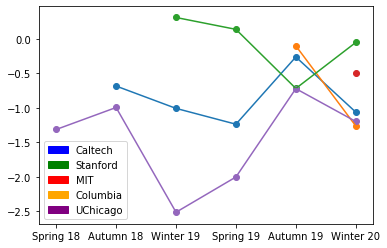

In [0]:
#plotting our results
plt.scatter(final_graph_uchicago[0], final_graph_uchicago[1])
uchicago_plot = plt.plot(final_graph_uchicago[0], final_graph_uchicago[1], label='UChicago')
plt.scatter(final_graph_columbia[0], final_graph_columbia[1])
columbia_plot = plt.plot(final_graph_columbia[0], final_graph_columbia[1], label='Columbia')
plt.scatter(final_graph_mit[0], final_graph_mit[1])
mit_plot = plt.plot(final_graph_mit[0], final_graph_mit[1], label='MIT')
plt.scatter(final_graph_stanford[0], final_graph_stanford[1])
stanford_plot = plt.plot(final_graph_stanford[0], final_graph_stanford[1], label='Stanford')
plt.scatter(final_graph_caltech[0], final_graph_caltech[1])
caltech_plot = plt.plot(final_graph_caltech[0], final_graph_caltech[1], label='Caltech')

purple = mpatches.Patch(color='purple', label='UChicago')
cyan = mpatches.Patch(color = 'orange', label='Columbia')
red = mpatches.Patch(color = 'red', label = 'MIT')
green = mpatches.Patch(color = 'green', label='Stanford')
blue = mpatches.Patch(color='blue', label='Caltech')
plt.legend(handles=[blue, green, red, cyan, purple])
plt.show()